In [76]:
import re
import glob
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [77]:
import os
os.listdir(os.getcwd())

['combined_data.csv',
 'filtered_data.csv',
 'tennis data.ipynb',
 'tennis data_new.ipynb',
 'tennis_atp']

In [4]:
# !git clone https://github.com/JeffSackmann/tennis_atp.git

In [78]:
directory =  os.getcwd()+"/tennis_atp"
pattern = r"atp_matches_\d{4}\.csv"
files = os.listdir(directory)
filtered_files = [file for file in files if re.match(pattern, file)]
for file in filtered_files:
    print(file)

atp_matches_1968.csv
atp_matches_1969.csv
atp_matches_1970.csv
atp_matches_1971.csv
atp_matches_1972.csv
atp_matches_1973.csv
atp_matches_1974.csv
atp_matches_1975.csv
atp_matches_1976.csv
atp_matches_1977.csv
atp_matches_1978.csv
atp_matches_1979.csv
atp_matches_1980.csv
atp_matches_1981.csv
atp_matches_1982.csv
atp_matches_1983.csv
atp_matches_1984.csv
atp_matches_1985.csv
atp_matches_1986.csv
atp_matches_1987.csv
atp_matches_1988.csv
atp_matches_1989.csv
atp_matches_1990.csv
atp_matches_1991.csv
atp_matches_1992.csv
atp_matches_1993.csv
atp_matches_1994.csv
atp_matches_1995.csv
atp_matches_1996.csv
atp_matches_1997.csv
atp_matches_1998.csv
atp_matches_1999.csv
atp_matches_2000.csv
atp_matches_2001.csv
atp_matches_2002.csv
atp_matches_2003.csv
atp_matches_2004.csv
atp_matches_2005.csv
atp_matches_2006.csv
atp_matches_2007.csv
atp_matches_2008.csv
atp_matches_2009.csv
atp_matches_2010.csv
atp_matches_2011.csv
atp_matches_2012.csv
atp_matches_2013.csv
atp_matches_2014.csv
atp_matches_2

In [79]:
len(filtered_files)

56

In [80]:
dfs = []

# Iterate over each file
for file in filtered_files:
    file_path = os.path.join(directory, file)
    try:
        df = pd.read_csv(file_path)
        if len(dfs) > 0:
            if not all(df.columns == dfs[0].columns):
                raise ValueError(f"Columns of {file} do not match previous files.")
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    print(combined_df.shape)
else:
    print("No valid CSV files found.")

(191920, 49)


In [8]:
combined_df.sample(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
158772,2012-505,Santiago,Clay,28.0,A,2012-01-30,6,104919,NaN,NaN,...,41.0,26.0,16.0,9.0,3.0,6.0,79.0,659.0,54.0,845.0
125114,2001-429,Stockholm,Hard,32.0,A,2001-10-22,13,102358,5.0,NaN,...,35.0,23.0,19.0,10.0,11.0,16.0,20.0,1300.0,65.0,591.0
166508,2014-319,Kitzbuhel,Clay,28.0,A,2014-07-27,22,104216,NaN,Q,...,38.0,29.0,17.0,14.0,0.0,4.0,104.0,553.0,43.0,970.0
89610,1991-322,Geneva,Clay,32.0,A,1991-09-09,1,101843,1.0,NaN,...,49.0,27.0,4.0,8.0,7.0,11.0,9.0,1578.0,88.0,408.0
83202,1990-D029,Davis Cup G1 PO: CHN vs PAK,Hard,4.0,D,1990-02-02,5,101701,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1044.0,2.0,NaN,NaN
114786,1998-520,Roland Garros,Clay,128.0,G,1998-05-25,57,102238,16.0,NaN,...,77.0,53.0,22.0,19.0,9.0,18.0,16.0,1970.0,89.0,519.0
112275,1997-80,Boston,Hard,32.0,A,1997-08-18,23,102024,NaN,NaN,...,27.0,12.0,11.0,9.0,0.0,5.0,73.0,669.0,58.0,793.0
145620,2007-580,Australian Open,Hard,128.0,G,2007-01-15,117,103163,12.0,NaN,...,65.0,41.0,26.0,18.0,5.0,11.0,12.0,1855.0,8.0,2295.0
80899,1989-403,Key Biscayne,Hard,128.0,M,1989-03-20,89,101404,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,83.0,NaN
31591,1976-316,Bastad,Clay,64.0,A,1976-07-04,32,100280,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
null_percentage = combined_df.isnull().mean() * 100
print("Percentage of null values in each column:")
round(null_percentage,0)

Percentage of null values in each column:


tourney_id             0.0
tourney_name           0.0
surface                2.0
draw_size              0.0
tourney_level          0.0
tourney_date           0.0
match_num              0.0
winner_id              0.0
winner_seed           63.0
winner_entry          91.0
winner_name            0.0
winner_hand            0.0
winner_ht              9.0
winner_ioc             0.0
winner_age             1.0
loser_id               0.0
loser_seed            81.0
loser_entry           85.0
loser_name             0.0
loser_hand             0.0
loser_ht              15.0
loser_ioc              0.0
loser_age              2.0
score                  0.0
best_of                0.0
round                  0.0
minutes               52.0
w_ace                 50.0
w_df                  50.0
w_svpt                50.0
w_1stIn               50.0
w_1stWon              50.0
w_2ndWon              50.0
w_SvGms               50.0
w_bpSaved             50.0
w_bpFaced             50.0
l_ace                 50.0
l

In [81]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191920 entries, 0 to 191919
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          191920 non-null  object 
 1   tourney_name        191920 non-null  object 
 2   surface             188930 non-null  object 
 3   draw_size           191085 non-null  float64
 4   tourney_level       191920 non-null  object 
 5   tourney_date        191920 non-null  int64  
 6   match_num           191920 non-null  int64  
 7   winner_id           191920 non-null  int64  
 8   winner_seed         70926 non-null   float64
 9   winner_entry        16743 non-null   object 
 10  winner_name         191920 non-null  object 
 11  winner_hand         191910 non-null  object 
 12  winner_ht           175012 non-null  float64
 13  winner_ioc          191912 non-null  object 
 14  winner_age          190610 non-null  float64
 15  loser_id            191920 non-nul

In [142]:
pd.set_option('display.max_columns', None)
combined_df.sample(4)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
186446,2022-0424,Dallas,Hard,32.0,A,20220207,299,202385,4.0,NaN,Jenson Brooksby,R,188.0,USA,21.2,106218,7.0,NaN,Marcos Giron,R,180.0,USA,28.5,6-4 6-7(4) 7-6(5),3,SF,173.0,3.0,2.0,128.0,85.0,58.0,25.0,17.0,6.0,8.0,9.0,0.0,114.0,79.0,59.0,15.0,17.0,4.0,7.0,54.0,1083.0,70.0,918.0
70796,1986-420,Stratton Mountain,Hard,64.0,A,19860804,17,100689,5.0,NaN,Tim Mayotte,R,190.0,USA,26.0,100567,NaN,NaN,Chip Hooper,R,198.0,USA,27.7,3-6 7-5 7-6,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,138.0,NaN
158441,2011-352,Paris Masters,Hard,48.0,M,20111107,37,104607,5.0,NaN,Tomas Berdych,R,196.0,CZE,26.1,104269,NaN,NaN,Fernando Verdasco,L,188.0,ESP,27.9,6-3 7-5,3,R32,105.0,3.0,1.0,72.0,37.0,28.0,16.0,11.0,3.0,6.0,2.0,4.0,63.0,38.0,24.0,9.0,10.0,5.0,10.0,7.0,3230.0,23.0,1595.0
138586,2005-520,Roland Garros,Clay,128.0,G,20050523,17,104745,4.0,NaN,Rafael Nadal,L,185.0,ESP,18.9,102694,NaN,NaN,Lars Burgsmuller,R,183.0,GER,29.4,6-1 7-6(4) 6-1,5,R128,105.0,5.0,3.0,77.0,48.0,42.0,19.0,14.0,0.0,0.0,3.0,4.0,89.0,50.0,33.0,19.0,12.0,4.0,8.0,5.0,2600.0,96.0,426.0


In [12]:
null_percentage = combined_df.isnull().mean() * 100
columns_with_few_nulls = null_percentage[null_percentage <= 30].index
print("Columns with less than 30% null values:")
print(columns_with_few_nulls)

Columns with less than 30% null values:
Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_name',
       'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of',
       'round', 'winner_rank', 'loser_rank'],
      dtype='object')


In [134]:
filtered_df = combined_df[columns_with_few_nulls]
filtered_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank
0,1968-2029,Dublin,Grass,32.0,A,19680708,270,112411,Doug Smith,U,...,Peter Ledbetter,U,NaN,IRL,24.0,6-1 7-5,3,R32,NaN,NaN
1,1968-2029,Dublin,Grass,32.0,A,19680708,271,126914,Louis Pretorius,R,...,Maurice Pollock,U,NaN,IRL,NaN,6-1 6-1,3,R32,NaN,NaN
2,1968-2029,Dublin,Grass,32.0,A,19680708,272,209523,Cecil Pedlow,U,...,John Mulvey,U,NaN,IRL,NaN,6-2 6-2,3,R32,NaN,NaN
3,1968-2029,Dublin,Grass,32.0,A,19680708,273,100084,Tom Okker,R,...,Unknown Fearmon,U,NaN,NaN,NaN,6-1 6-1,3,R32,NaN,NaN
4,1968-2029,Dublin,Grass,32.0,A,19680708,274,100132,Armistead Neely,R,...,Harry Sheridan,U,NaN,IRL,NaN,6-2 6-4,3,R32,NaN,NaN


In [136]:
# filtered_df.shape
filtered_df['score']

0             6-1 7-5
1             6-1 6-1
2             6-2 6-2
3             6-1 6-1
4             6-2 6-4
             ...     
191915        6-4 7-5
191916     6-4 7-6(4)
191917    6-1 3-6 6-2
191918    3-6 6-1 6-4
191919     7-6(5) 7-5
Name: score, Length: 191920, dtype: object

In [85]:
filtered_df.isnull().sum()

tourney_id           0
tourney_name         0
surface           2990
draw_size          835
tourney_level        0
tourney_date         0
match_num            0
winner_id            0
winner_name          0
winner_hand         10
winner_ht        16908
winner_ioc           8
winner_age        1310
loser_id             0
loser_name           0
loser_hand          49
loser_ht         29660
loser_ioc           72
loser_age         4654
score                9
best_of              0
round                0
winner_rank      35758
loser_rank       44130
dtype: int64

In [122]:
unique_counts = filtered_df.nunique()
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
tourney_id        8303
tourney_name      4098
surface              4
draw_size           19
tourney_level        5
tourney_date      3307
match_num          497
winner_id         4306
winner_name       4317
winner_hand          4
winner_ht           31
winner_ioc         129
winner_age         332
loser_id          7343
loser_name        7359
loser_hand           4
loser_ht            31
loser_ioc          144
loser_age          376
score            23349
best_of              3
round               10
winner_rank       1231
loser_rank        1447
dtype: int64


In [17]:
unique_counts[unique_counts >= 10].index

Index(['tourney_id', 'tourney_name', 'draw_size', 'tourney_date', 'match_num',
       'winner_id', 'winner_name', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_name', 'loser_ht', 'loser_ioc', 'loser_age', 'score',
       'round', 'winner_rank', 'loser_rank'],
      dtype='object')

In [123]:
filtered_df = filtered_df.dropna(axis=0)
filtered_df['tourney_date'] = pd.to_datetime(filtered_df['tourney_date'])
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134854 entries, 18088 to 191888
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   tourney_id     134854 non-null  object        
 1   tourney_name   134854 non-null  object        
 2   surface        134854 non-null  object        
 3   draw_size      134854 non-null  float64       
 4   tourney_level  134854 non-null  object        
 5   tourney_date   134854 non-null  datetime64[ns]
 6   match_num      134854 non-null  int64         
 7   winner_id      134854 non-null  int64         
 8   winner_name    134854 non-null  object        
 9   winner_hand    134854 non-null  object        
 10  winner_ht      134854 non-null  float64       
 11  winner_ioc     134854 non-null  object        
 12  winner_age     134854 non-null  float64       
 13  loser_id       134854 non-null  int64         
 14  loser_name     134854 non-null  object        
 15  l

In [90]:
filtered_df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of,winner_rank,loser_rank
count,134854.000000,134854,134854.000000,134854.000000,134854.000000,134854.000000,134854.000000,134854.000000,134854.000000,134854.000000,134854.000000,134854.000000
mean,55.400804,1970-01-01 00:00:00.020000678,72.530114,104970.154426,185.101525,25.596918,104840.358536,184.659721,25.779292,3.398357,63.801148,97.256589
min,2.000000,1970-01-01 00:00:00.019730829,1.000000,100005.000000,160.000000,15.100000,100003.000000,160.000000,15.100000,3.000000,1.000000,1.000000
25%,32.000000,1970-01-01 00:00:00.019900409,12.000000,101191.000000,180.000000,22.800000,101154.000000,180.000000,22.900000,3.000000,16.000000,35.000000
50%,32.000000,1970-01-01 00:00:00.020000110,26.000000,102437.000000,185.000000,25.300000,102434.000000,185.000000,25.500000,3.000000,42.000000,67.000000
75%,64.000000,1970-01-01 00:00:00.020110323,69.000000,104339.000000,190.000000,28.100000,104327.000000,188.000000,28.300000,3.000000,83.000000,112.000000
max,128.000000,1970-01-01 00:00:00.020231127,1701.000000,209950.000000,211.000000,45.300000,212044.000000,211.000000,48.200000,5.000000,2091.000000,2146.000000
std,37.086017,NaN,108.954482,13282.117771,6.647874,3.843722,12790.724805,6.654060,3.927624,0.798768,81.661676,118.895255


In [124]:
object_columns = filtered_df.select_dtypes(include='object').columns
print("Object columns in the DataFrame:")
print(object_columns)

Object columns in the DataFrame:
Index(['tourney_id', 'tourney_name', 'surface', 'tourney_level', 'winner_name',
       'winner_hand', 'winner_ioc', 'loser_name', 'loser_hand', 'loser_ioc',
       'score', 'round'],
      dtype='object')


In [20]:
object_columns = filtered_df.select_dtypes(include='object').columns
unique_counts_object_columns = filtered_df[object_columns].nunique()
print("Number of unique values in each object column:")
print(unique_counts_object_columns)

Number of unique values in each object column:
tourney_id        5810
tourney_name      2327
surface              4
tourney_level        5
winner_name       1929
winner_hand          4
winner_ioc          90
loser_name        2344
loser_hand           4
loser_ioc           91
score            17512
round               10
dtype: int64


In [87]:
# Filter out rows where the score is not in the expected format
invalid_scores = filtered_df[~filtered_df['score'].str.match(r'^(\d+-\d+\s?)+$')]
invalid_scores['score']

18932       3-6 6-7 6-4 6-6 RET
20592                       W/O
20983               6-4 5-0 RET
21037       4-6 7-5 4-6 4-1 RET
21173           3-6 7-5 3-5 RET
                  ...          
191812               6-4 7-6(4)
191813        6-7(4) 7-6(5) 6-2
191817    6-7(3) 7-6(5) 4-0 RET
191818           7-6(6) 4-6 6-3
191875               7-6(7) 7-5
Name: score, Length: 39043, dtype: object

In [125]:
filtered_df = filtered_df[filtered_df['score'].str.match(r'^(\d+-\d+\s?)+$')]

In [126]:
# Split 'score' column into separate sets
filtered_df['sets'] = filtered_df['score'].str.split()
winner_scores = []
loser_scores = []

for index, row in filtered_df.iterrows():
    winner_score = 0
    loser_score = 0
    for set_score in row['sets']:
        player1, player2 = map(int, set_score.split('-'))
        if player1 > player2:
            winner_score += 1
        else:
            loser_score += 1
    winner_scores.append(winner_score)
    loser_scores.append(loser_score)

filtered_df['winner_score'] = winner_scores
filtered_df['loser_score'] = loser_scores
filtered_df = filtered_df.drop(['score', 'sets'], axis=1)

In [127]:
filtered_df[['winner_score', 'loser_score']]

,winner_score,loser_score
18088,2,0
18089,2,1
18090,2,0
18091,2,1
18093,2,1
...,...,...
191836,2,0
191867,2,0
191877,2,1
191887,2,0


In [128]:
outcome = []
for winner_score, loser_score in zip(winner_scores, loser_scores):
    if winner_score > loser_score:
        outcome.append(1)  # Winner
    else:
        outcome.append(0)  # Loser

filtered_df['outcome'] = outcome

In [129]:
filtered_df['outcome'].unique()

array([1, 0], dtype=int64)

In [130]:
filtered_df['outcome'].value_counts()

outcome
1    95785
0       26
Name: count, dtype: int64

In [117]:
filtered_df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_name',
       'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'best_of', 'round',
       'winner_rank', 'loser_rank', 'winner_score', 'loser_score', 'outcome'],
      dtype='object')

In [98]:
object_columns = filtered_df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in object_columns:
    filtered_df[column] = label_encoder.fit_transform(filtered_df[column])

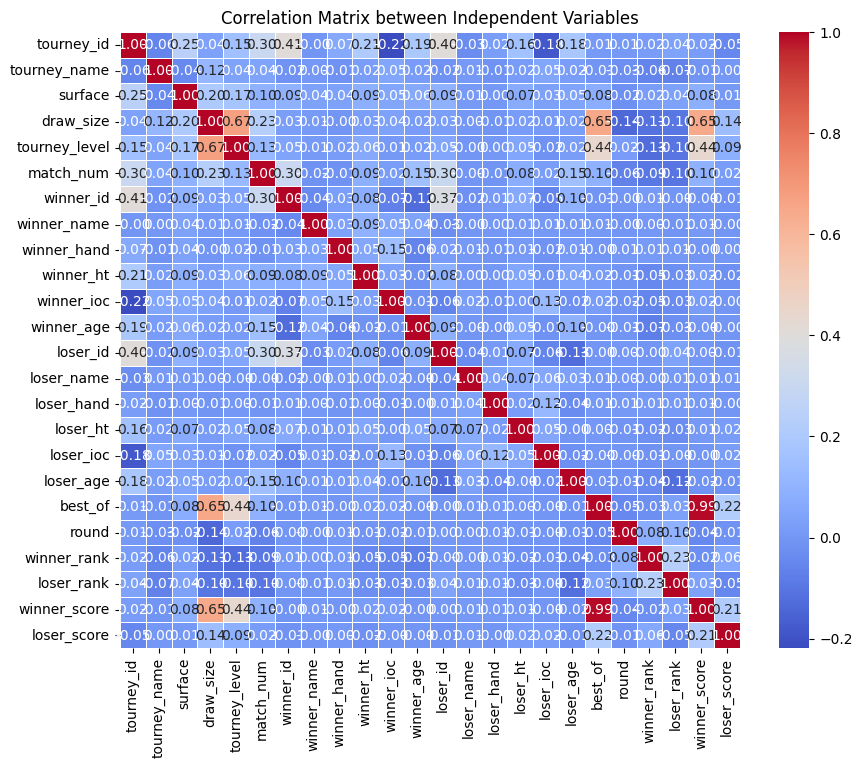

In [99]:
independent_variables = filtered_df.drop(['outcome', 'tourney_date'], axis=1)
correlation_matrix = independent_variables.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Independent Variables')
plt.show()

In [51]:
# Set threshold for correlation coefficient
threshold = 0.7
high_corr_vars = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            high_corr_vars.add(var1)
            high_corr_vars.add(var2)

In [118]:
# Remove one variable from each pair of highly correlated variables
independent_variables_filtered = independent_variables.drop(high_corr_vars, axis=1)
print("Remaining independent variables after filtering for multicollinearity:")
print(independent_variables_filtered.columns)

Remaining independent variables after filtering for multicollinearity:
Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'match_num', 'winner_id', 'winner_name', 'winner_hand', 'winner_ht',
       'winner_ioc', 'winner_age', 'loser_id', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'round', 'winner_rank',
       'loser_rank', 'loser_score'],
      dtype='object')


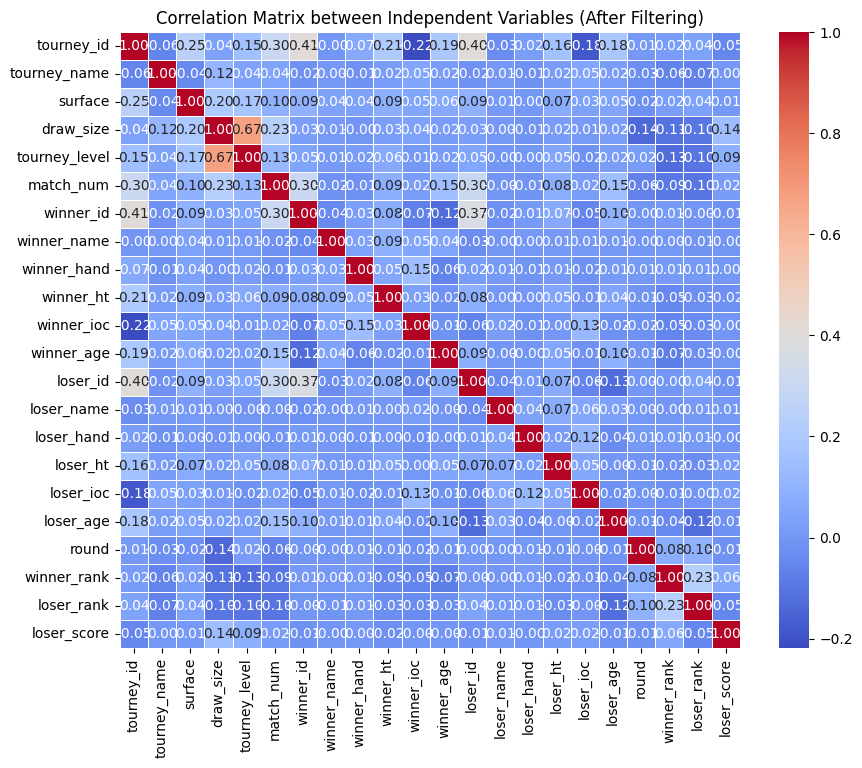

In [53]:
# Compute correlation matrix for the remaining independent variables
correlation_matrix_filtered = independent_variables_filtered.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Independent Variables (After Filtering)')
plt.show()

In [119]:
# Filter data for matches played in 2019
test_data = filtered_df[filtered_df['tourney_date'].dt.year == 2019]
train_data = filtered_df[filtered_df['tourney_date'].dt.year != 2019]
print("Train set size:", len(train_data))
print("Test set size:", len(test_data))

Train set size: 95811
Test set size: 0


In [59]:
# train_data.shape
high_corr_vars

{'best_of', 'winner_score'}

In [58]:
train_data[independent_variables_filtered.columns].shape

(94294, 22)

In [31]:
test_data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,loser_ht,loser_ioc,loser_age,best_of,round,winner_rank,loser_rank,winner_score,loser_score,outcome
179101,5054,22,3,32.0,0,2019-01-07,300,105815,1656,2,...,188.0,32,23.3,3,2,63.0,93.0,2,0,1
179102,5054,22,3,32.0,0,2019-01-07,299,111815,253,1,...,193.0,34,28.7,3,9,93.0,58.0,2,1,1
179103,5054,22,3,32.0,0,2019-01-07,298,105815,1656,2,...,178.0,34,35.2,3,9,63.0,34.0,2,0,1
179107,5054,22,3,32.0,0,2019-01-07,294,104259,1414,2,...,178.0,43,31.6,3,3,34.0,13.0,2,0,1
179111,5054,22,3,32.0,0,2019-01-07,290,105526,768,2,...,183.0,61,31.7,3,5,58.0,360.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181799,5105,1965,3,8.0,2,2019-11-05,299,200282,49,2,...,188.0,86,21.7,3,9,18.0,47.0,3,1,1
181800,5105,1965,3,8.0,2,2019-11-05,298,206173,776,2,...,183.0,74,20.1,3,9,95.0,60.0,3,1,1
181801,5105,1965,3,8.0,2,2019-11-05,297,200282,49,2,...,183.0,60,20.8,3,8,18.0,56.0,3,0,1
181808,5105,1965,3,8.0,2,2019-11-05,290,126207,546,2,...,183.0,77,21.1,3,8,47.0,74.0,3,0,1


In [107]:
X_train = train_data.drop(columns=['outcome', 'tourney_date', 'winner_score', 'best_of'])  # Independent variables
y_train = train_data['outcome']  # Target variable

In [108]:
X_train.shape, y_train.shape

((94294, 22), (94294,))

## __Logistic Regression__

In [109]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [110]:
X_test = test_data.drop(columns=['outcome', 'tourney_date', 'winner_score', 'best_of'])
y_test = test_data['outcome']
y_pred_lr_test = lr_model.predict(X_test)

In [112]:
X_test.shape, y_test.shape

((1517, 22), (1517,))

In [65]:
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Logistic Regression Accuracy (Test):", accuracy_lr_test)

Logistic Regression Accuracy (Test): 1.0


In [103]:
print("Classification Report of Logistic Regression on (Test):")
print(classification_report(y_test, y_pred_lr_test))

Classification Report of Logistic Regression on (Test):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1517

    accuracy                           1.00      1517
   macro avg       1.00      1.00      1.00      1517
weighted avg       1.00      1.00      1.00      1517



## __Naive Bayes__

In [67]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [68]:
y_pred_nb_test = nb_model.predict(X_test)

In [69]:
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Naive Bayes Accuracy (Test):", accuracy_nb_test)

Naive Bayes Accuracy (Test): 0.998681608437706


In [102]:
print("Classification Report of Naive model on (Test):")
print(classification_report(y_test, y_pred_nb_test))

Classification Report of Naive model on (Test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00      1517

    accuracy                           1.00      1517
   macro avg       0.50      0.50      0.50      1517
weighted avg       1.00      1.00      1.00      1517



## __EloModel__

In [71]:
class EloModel:
    def __init__(self, k_factor=32):
        self.k_factor = k_factor
        self.elo_ratings = {}
    
    def fit(self, X_train, y_train):
        for index, row in X_train.iterrows():
            winner_id = row['winner_id']
            loser_id = row['loser_id']
            self.update_elo(winner_id, loser_id)
    
    def update_elo(self, winner_id, loser_id):
        winner_elo = self.elo_ratings.get(winner_id, 1500)
        loser_elo = self.elo_ratings.get(loser_id, 1500)
        expected_win = 1 / (1 + 10 ** ((loser_elo - winner_elo) / 400))
        winner_new_elo = winner_elo + self.k_factor * (1 - expected_win)
        loser_new_elo = loser_elo - self.k_factor * (1 - expected_win)
        self.elo_ratings[winner_id] = winner_new_elo
        self.elo_ratings[loser_id] = loser_new_elo
    
    def predict(self, X_test):
        # Use Elo ratings to predict match outcomes
        y_pred_elo = []
        for index, row in X_test.iterrows():
            winner_elo = self.elo_ratings.get(row['winner_id'], 1500)
            loser_elo = self.elo_ratings.get(row['loser_id'], 1500)
            if winner_elo > loser_elo:
                y_pred_elo.append(1)  # Winner predicted
            else:
                y_pred_elo.append(0)  # Winner not predicted
        return y_pred_elo

In [72]:
elo_model = EloModel()
elo_model.fit(X_train, y_train)
# y_pred_elo = elo_model.predict(X_test)
elo_model

In [73]:
y_pred_elo_test = elo_model.predict(X_test)

In [45]:
accuracy_elo_test = accuracy_score(y_test, y_pred_elo_test)
print("Elo Accuracy (Test):", round(accuracy_elo_test,2))

Elo Accuracy (Test): 0.63


In [101]:
print("Classification Report of Elo model on (Test):")
print(classification_report(y_test, y_pred_elo_test))

Classification Report of Elo model on (Test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.63      0.77      1517

    accuracy                           0.63      1517
   macro avg       0.50      0.32      0.39      1517
weighted avg       1.00      0.63      0.77      1517

